In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="plotly")

df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Each image has 28x28 pexels, thus 784 pexel values and other one is the label**

In [3]:
df.shape

(42000, 785)

**Total 42000 images**

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32660,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


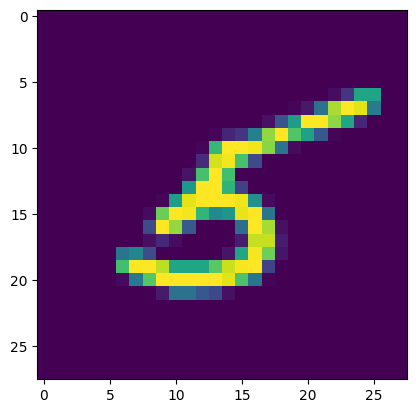

In [5]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[13886, 1:].values.reshape(28, 28))

In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# **Fitting without PCA**

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

14.007339477539062


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

# **Fitting with PCA**

# **Goal is to get the number of componenets which explains atleast 90% of the variance**

# **Applying standardization**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.decomposition import PCA

# n_componenets is a hyperparameter, if None, we will receive Principal Components
# equal to the number of features
pca = PCA(n_components = None)

In [16]:
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [17]:
X_train_scaled_pca.shape

(33600, 784)

**see the shape is still 784, because we have used None, which will include all the Princical Componenets**

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_pca, y_train)

KNeighborsClassifier()

In [19]:
start = time.time()
y_pred_pca = knn.predict(X_test_scaled_pca)
print(time.time() - start)

8.337031364440918


**Time has been reduced**

In [20]:
accuracy_score(y_test, y_pred_pca)

0.9391666666666667

# **Eigen Values and Vectors**

In [21]:
# Lets say we have choose top 3 principal componenets
pca = PCA(n_components = 3)

X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# printing eigen values
# each eigen value shows that how much variance is explained by it
print(pca.explained_variance_)

# printing eigen vectors
print(pca.components_.shape)

[40.67111198 29.17023384 26.74459576]
(3, 784)


* as our n_components were 3 so we got 3 eigen values
* (3, 784) indicates that, we have a 784 dimensions coordinate space, and we have found 3 principal componenets 

# **Finding optimal number of Principal Components**

In [22]:
pca = PCA(n_components = None)

X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [23]:
# it shows the percentage of the explained variance 
# 1st one explaines 5%, second 4% and so on 
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

# **From the above variance values exk=plained by each principal componenet, we can sumup the values until we reach the index where we get >=90% variance, so we can use cumsum for this**

In [24]:
np.cumsum(pca.explained_variance_ratio_)

# below shows that each next value is the sum of the previous value
# use previous values to find the sum

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

# **plot to see the point at which we get >=90% variance**

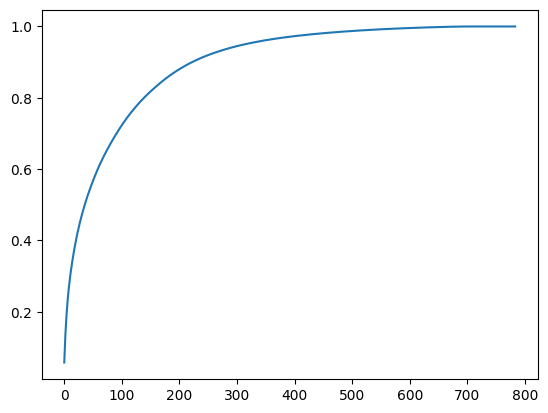

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

**we can see that around 250 PC's we get >=90% variance**

# **Visualization**

In [26]:
# Transforming to 2D coordinate system
pca = PCA(n_components = 2)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [30]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_scaled_pca[:, 0],
                 y = X_train_scaled_pca[:, 1],
                color = y_train_trf,
                color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [28]:
# Transforming to 3D coordinate system
pca = PCA(n_components = 3)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [29]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x = X_train_scaled_pca[:, 0],
                 y = X_train_scaled_pca[:, 1],
                 z = X_train_scaled_pca[:, 2], 
                color = y_train_trf)
fig.update_layout(
                    margin = dict(l=20,r=20, t=20, b = 20))
fig.show()